In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV as gscv
import sklearn.model_selection as sklms
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler #Standardization since Knn is distance based
link = 'https://raw.githubusercontent.com/Ari-vu/SML/main/Given_data/train.csv'
data = pd.read_csv(link)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

Defining the Dependent and Independent Variables, Scaling

In [ ]:
x = data.drop(columns = ["Lead"])
y = data["Lead"]
sc = StandardScaler()
sc.fit(data.drop('Lead', axis=1))
x_scaled = sc.transform(data.drop('Lead',axis=1))

First Model

In [ ]:
first_model = knn(n_neighbors= 5)
first_model.fit(x_scaled, y)
print(f'Accuracy: {first_model.score(x_scaled, y)}')

Accuracy: 0.8537054860442733


Finding Hyperparameters

In [ ]:
first_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Creating a Secondary Model

In [ ]:
second_model = knn(n_neighbors = 3, p = 2, leaf_size= 30)
second_model.fit(x_scaled, y)
print(f'Accuracy: {second_model.score(x_scaled, y)}')

Accuracy: 0.8941289701636189


[0.7699775952203136, 0.7372012696041822, 0.7843913368185212, 0.7718633308439132, 0.7997946228528753, 0.7911127707244211, 0.7863144137415982, 0.7863237490664674, 0.7911501120238984, 0.7978715459297983, 0.793091859596714, 0.7949962658700522, 0.7930545182972367, 0.7998319641523526]


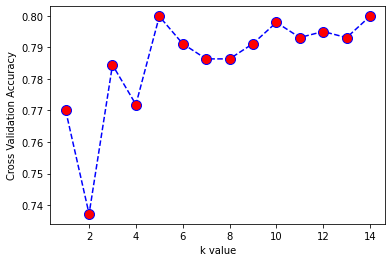

In [ ]:
k_range=range(1,15)
k_scores=[]
for k in k_range:
    kf_cv = knn(n_neighbors=k)
    scores = cvs(kf_cv, x_scaled, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
plt.plot(k_range, k_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('k value')
plt.ylabel('Cross Validation Accuracy')
plt.show()

GridSearch

In [ ]:
gs_model = knn()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = gscv(gs_model, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(x_scaled, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 14}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for dataset the with tuning is : {:.2f}%".format(accuracy) )

Accuracy for dataset the with tuning is : 79.88%


Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rscv
rs_model = knn()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)
rand_search = rscv(estimator = rs_model, param_distributions = param_grid, n_iter= 10, cv = 4,
verbose = 2, random_state = 50, n_jobs = -1)
rs_model = rand_search.fit(x_scaled, y)
print(f'The best values of chosen parameters are {rs_model.best_params_}')
accuracy = rs_model.best_score_ *100
print("Accuracy for the dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 4 folds for each of 10 candidates, totalling 40 fits
The best values of chosen parameters are {'n_neighbors': 18}
Accuracy for the dataset with tuning is : 78.54%


In [ ]:
models = [first_model, second_model, grid_search, rs_model]
cross_val = sklms.KFold(n_splits = 10, random_state = 50, shuffle=True)
misclass = np.zeros((10, len(models)))
acc = np.zeros((10, len(models)))

for i, (train_indices, val_indices) in enumerate(cross_val.split(x_scaled)):
  x_train, x_val=x_scaled[train_indices], x_scaled[val_indices]
  y_train, y_val=y[train_indices], y[val_indices]

  for j in range(np.shape(models)[0]):
    model = models[j]
    model.fit(x_scaled, y)
    prediction = model.predict(x_val)
    misclass[i, j] = np.mean(prediction != y_val)
    acc[i, j] = np.mean(prediction == y_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 5 folds 

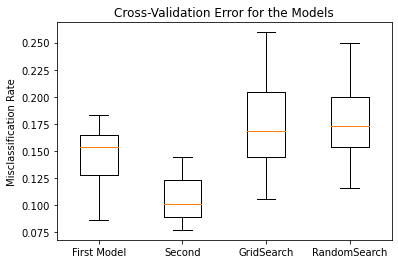

Misclassification rate of the KNeighborsClassifier() is: 0.14631254667662436
Accuracy of the KNeighborsClassifier() is: 0.8536874533233756
Misclassification rate of the KNeighborsClassifier(n_neighbors=3) is: 0.10588125466766245
Accuracy of the KNeighborsClassifier(n_neighbors=3) is: 0.8941187453323376
Misclassification rate of the GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1) is: 0.1741784914115011
Accuracy of the GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
     

In [ ]:
plt.boxplot(misclass)
plt.title('Cross-Validation Error for the Models')
plt.xticks(np.arange(len(models)) + 1, ('First Model', 'Second', 'GridSearch', 'RandomSearch'))
plt.ylabel('Misclassification Rate')
plt.show()

for x in range(len(models)):
  print(f'Misclassification rate of the {models[x]} is: {np.mean(misclass[:, x])}')
  print(f'Accuracy of the {models[x]} is: {1 - np.mean(misclass[:, x])}')